In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [54]:
carprice = pd.read_csv("/Users/user/Downloads/car data.csv")

In [55]:
print(carprice)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

There are 9 columns and 301 rows in this dataset

In [56]:
carprice.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
carprice.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Based on the descriptive statistics

Year: The data covers a range of years from 2003 and 2018, with a mean year of manufacture around 2013.63. This suggests that the dataset includes relatively recent car models.


Selling_Price: The selling prices of the cars vary widely, ranging from 0.1 to 35. The average selling price is approximately 4.66, with a standard deviation of around 5.08, indicating considerable variability in prices.


Present_Price: The present prices of the cars also exhibit a wide range, from 0.32 to 92.6. The average present price is about 7.63, with a standard deviation of approximately 8.64.


Driven_kms: The dataset includes cars that have been driven different distances, with a range from 500 to 500,000 kilometers. The average kilometers driven is around 36,947.21, with a notable standard deviation of about 38,886.88.


Owners: Most cars in the dataset have no previous owners, as indicated by the 25th, 50th, and 75th percentiles all being 0. However, there are instances of cars with up to 3 previous owners.


In [58]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [59]:
carprice.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
There are no missing value in the dataset

In [60]:
carprice.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [41]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
carprice["Car_Name"]=encode.fit_transform(carprice["Car_Name"])
carprice["Fuel_Type"]=encode.fit_transform(carprice["Fuel_Type"])
carprice["Selling_type"]=encode.fit_transform(carprice["Selling_type"])
carprice["Transmission"]=encode.fit_transform(carprice["Transmission"])

In [ ]:
Transforming categorical data into numerical data

In [42]:
print(carprice)

     Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          90  2014           3.35           5.59       27000          2   
1          93  2013           4.75           9.54       43000          1   
2          68  2017           7.25           9.85        6900          2   
3          96  2011           2.85           4.15        5200          2   
4          92  2014           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        69  2016           9.50          11.60       33988          1   
297        66  2015           4.00           5.90       60000          2   
298        69  2009           3.35          11.00       87934          2   
299        69  2017          11.50          12.50        9000          1   
300        66  2016           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0               0             1      0  
1    

In [43]:
print(carprice.corr())

               Car_Name      Year  Selling_Price  Present_Price  Driven_kms  \
Car_Name       1.000000  0.017265       0.499198       0.475336    0.064453   
Year           0.017265  1.000000       0.236141      -0.047192   -0.524342   
Selling_Price  0.499198  0.236141       1.000000       0.878914    0.029187   
Present_Price  0.475336 -0.047192       0.878914       1.000000    0.203618   
Driven_kms     0.064453 -0.524342       0.029187       0.203618    1.000000   
Fuel_Type     -0.371446 -0.053643      -0.509467      -0.440493   -0.166801   
Selling_type  -0.829718 -0.039896      -0.550724      -0.512121   -0.101419   
Transmission  -0.059855  0.000394      -0.367128      -0.348776   -0.162510   
Owner         -0.081192 -0.182104      -0.088344       0.008058    0.089216   

               Fuel_Type  Selling_type  Transmission     Owner  
Car_Name       -0.371446     -0.829718     -0.059855 -0.081192  
Year           -0.053643     -0.039896      0.000394 -0.182104  
Selling_Price 

Selling_Price has a strong positive correlation with Present_Price (0.879) and a moderate positive correlation with Car_Name (0.499) and Year (0.236).

Present_Price has a moderate positive correlation with Car_Name (0.475) and Year (0.047).

Car_Name has a weak positive correlation with Driven_kms (0.064).

Selling_Price has a moderate negative correlation with Fuel_Type (-0.509) and Selling_type (-0.551).

Present_Price has a moderate negative correlation with Fuel_Type (-0.440) and Selling_type (-0.512).

Year has a weak negative correlation with Driven_kms (-0.524).

There are weak correlations between Transmission and other variables.

There is little to no correlation between Owner and other variables.


/var/folders/q6/v17312c94b3gc98vt17wv7w00000gn/T/ipykernel_66301/2269580113.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carprice.Selling_Price)


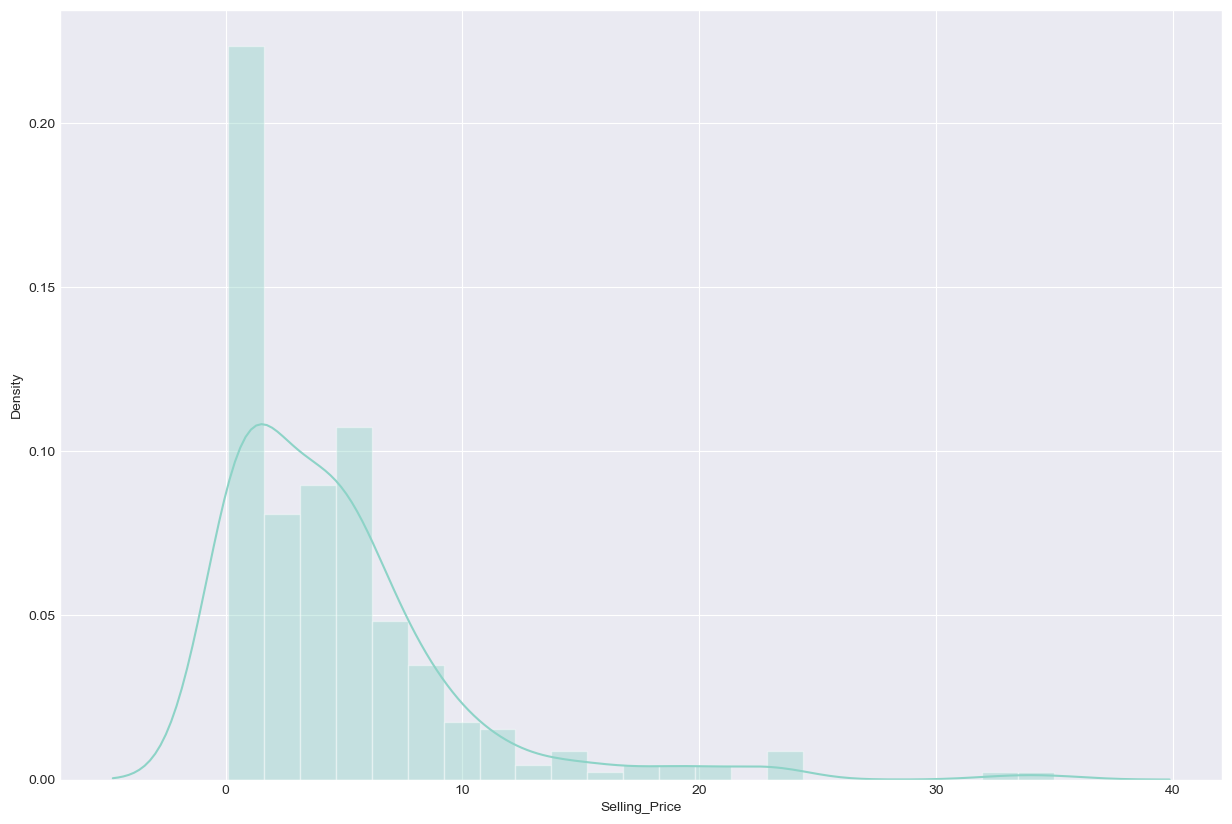

In [61]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.distplot(carprice.Selling_Price)
plt.show()

In [ ]:
The above plot shows the distribution of the values of the price column

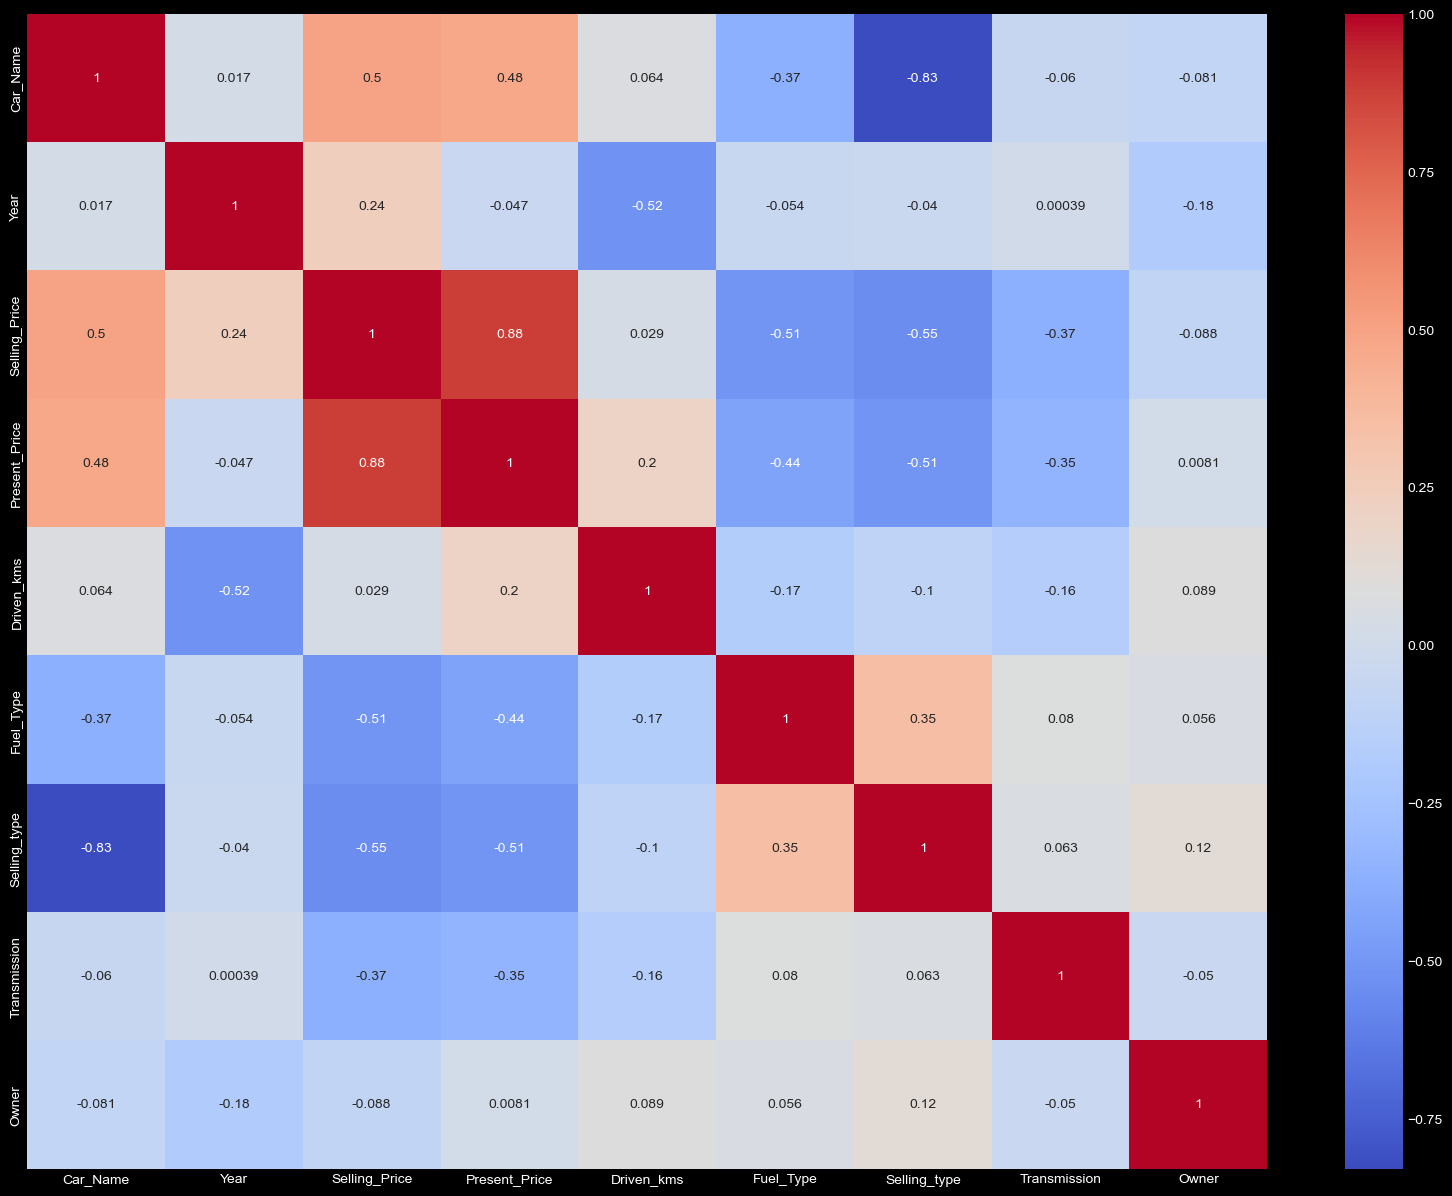

In [45]:
plt.style.use('dark_background')
plt.figure(figsize=(20, 15))
correlations = carprice.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

The above Heatmap show the correlation among all the features of this dataset:

TRAINING A CAR PRICE PREDICTION MODEL WITH MACHINE LEARNING

In [46]:
x = carprice.drop(["Selling_Price"], axis = 1)
y= carprice["Selling_Price"]

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_absolute_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r_squared = model.score(x_test, y_test)
print("R-squared Score:", r_squared)


Mean Absolute Error: 1.395604444569243
R-squared Score: 0.7543829593093792


The model achieved a mean absolute error (MAE) of approximately 1.40, indicating that, on average, its predictions deviate from the actual selling prices by around 1.40 units. Additionally, the R-squared score of about 0.75 suggests that approximately 75% of the variability in the selling prices can be explained by the features included in the model. while the model demonstrates reasonably good predictive performance, there is still room for improvement to enhance its accuracy further.